# Global Societal Endangerment Index (GSEI)

Development notebook for step 5: Normalisation

In [15]:
import pandas as pd
import numpy as np
import categories as my_cat
from outliers import find_outliers, find_outliers_per_indicator
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [16]:
# load data
df = pd.read_csv("data/processing/multivariate_all_data.csv")
countries = pd.read_csv("data/processing/selected_countries.csv")
categories = my_cat.load('4.1')

df

,Temp Change max 2012-2022,Disaster Affected Population 2020-2025,Disaster Damage US$T 2020-2025,Undernourishment (%),Renewable Freshwater per Capita (m3),Population below Poverty Line (%),Health Expenditure per Capita (US$),RoW Health Expenditure (%),No Education (%),Education Expenditure (US$M),...,pol_PC4,pol_PC5,pol_PC6,water_air_PC1,water_air_PC2,water_air_PC3,disease_PC1,disease_PC2,disease_PC3,disease_PC4
0,2.01200,1.301606e+07,0.000000e+00,30.400000,1178.737859,23.304235,81.000,8.000000,58.380000,819.557820,...,-0.157403,0.451415,-0.505144,1.653817,-0.551784,0.344034,0.090144,-0.350564,-0.636542,-0.235712
1,1.75200,4.544311e+06,0.000000e+00,23.200000,4285.826520,23.304235,101.000,7.000000,23.932941,3047.738550,...,-0.231028,-0.006220,-0.390847,0.824321,-0.093015,-0.409678,1.992797,-0.404285,0.069539,-0.540231
2,2.02800,8.400000e+01,0.000000e+00,4.500000,9567.281462,23.138889,414.000,0.000000,3.280000,470.235520,...,0.586811,-0.234792,0.104068,-0.578045,-0.176162,0.080052,-1.054480,-0.055411,0.311029,0.261080
3,3.24300,1.149573e+05,1.371492e+10,2.609091,4027.359502,12.512500,3.192,0.076923,3.064792,96.518660,...,0.219355,-0.118686,0.035244,-1.481279,0.295753,-0.300041,-2.077185,0.333092,-0.497454,-0.189044
4,1.69900,3.460000e+02,0.000000e+00,2.700000,15.665548,12.512500,2.315,0.076923,9.720000,28330.640427,...,0.846905,0.356944,-0.048044,-1.443530,0.430280,-0.053021,-0.416271,-0.269504,1.131575,0.000319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.44000,5.254044e+05,7.836475e+08,5.400000,29843.081404,23.138889,236.000,0.000000,7.609643,9814.788208,...,-0.416857,0.316650,0.536857,0.145085,-0.335460,0.634324,0.605262,-0.551248,1.068391,-0.013318
188,1.78605,1.885344e+06,2.354600e+07,39.500000,56.542461,23.304235,38.000,7.000000,57.490000,3047.738550,...,-0.461834,0.256579,-0.162456,0.529793,-0.633598,0.142639,0.921834,-0.635536,-0.785883,0.997726
189,1.81100,1.228681e+07,3.910613e+09,8.100000,728.424454,23.304235,570.000,7.000000,5.650000,18116.493260,...,-0.322633,-0.116275,0.317120,0.477926,-0.255339,-0.603978,3.092266,4.768779,2.565955,-0.075491
190,1.45000,1.228396e+07,0.000000e+00,35.400000,4091.083850,42.820000,76.000,0.000000,13.960000,964.790140,...,-0.524287,-0.338142,-0.182993,1.585180,-0.578395,-0.472125,2.681855,1.528531,-0.796329,0.600526


array([[<Axes: title={'center': 'Temp Change max 2012-2022'}>,
        <Axes: title={'center': 'Disaster Affected Population 2020-2025'}>,
        <Axes: title={'center': 'Disaster Damage US$T 2020-2025'}>,
        <Axes: title={'center': 'Undernourishment (%)'}>,
        <Axes: title={'center': 'Renewable Freshwater per Capita (m3)'}>],
       [<Axes: title={'center': 'Population below Poverty Line (%)'}>,
        <Axes: title={'center': 'Health Expenditure per Capita (US$)'}>,
        <Axes: title={'center': 'RoW Health Expenditure (%)'}>,
        <Axes: title={'center': 'No Education (%)'}>,
        <Axes: title={'center': 'Education Expenditure (US$M)'}>],
       [<Axes: title={'center': 'Crime Rate'}>,
        <Axes: title={'center': 'Government Debt (% of GDP)'}>,
        <Axes: title={'center': 'Total Reserves (% of External Debt)'}>,
        <Axes: title={'center': 'Gini Coefficient'}>,
        <Axes: title={'center': 'Inflation (%)'}>],
       [<Axes: title={'center': 'Youth U

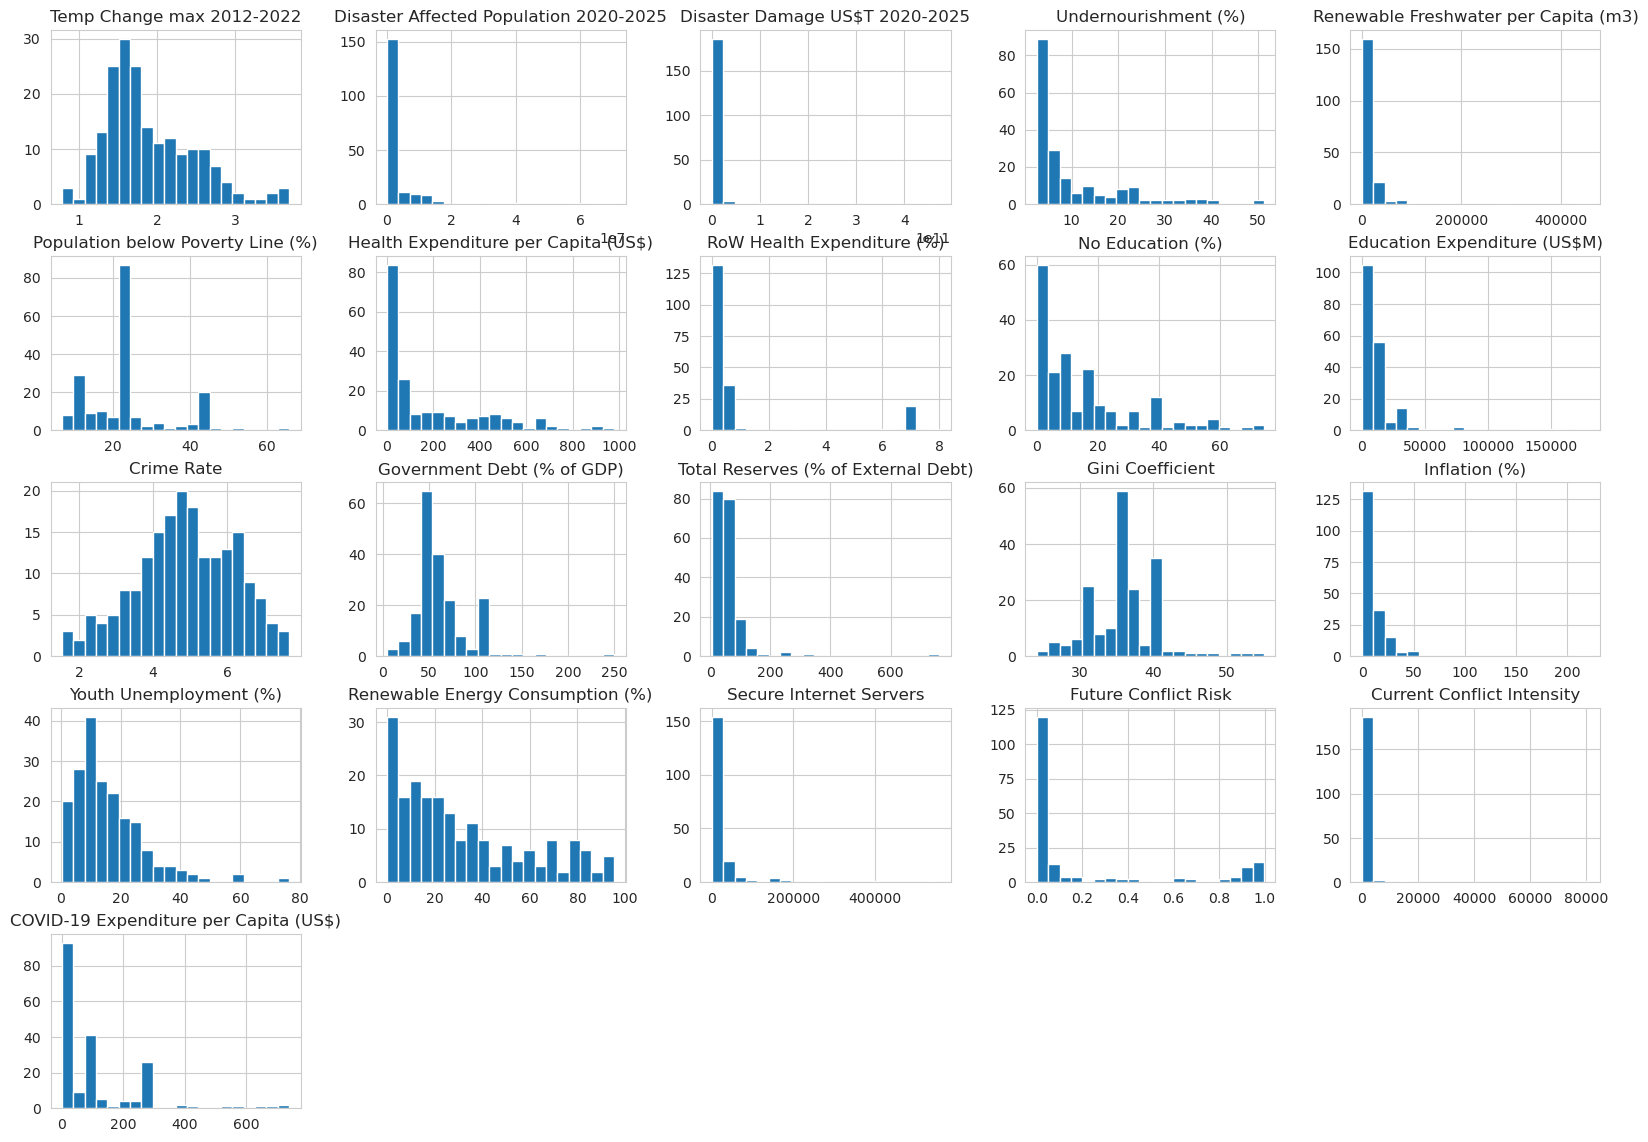

In [17]:
df.drop(columns=categories['pca']).hist(bins=20, figsize=(20, 14))

In [18]:
# these columns are relevant for this step
df.drop(columns=categories['pca']).columns.to_series().reset_index(drop=True)

0                  Temp Change max 2012-2022
1     Disaster Affected Population 2020-2025
2             Disaster Damage US$T 2020-2025
3                       Undernourishment (%)
4       Renewable Freshwater per Capita (m3)
5          Population below Poverty Line (%)
6        Health Expenditure per Capita (US$)
7                 RoW Health Expenditure (%)
8                           No Education (%)
9               Education Expenditure (US$M)
10                                Crime Rate
11                Government Debt (% of GDP)
12       Total Reserves (% of External Debt)
13                          Gini Coefficient
14                             Inflation (%)
15                    Youth Unemployment (%)
16          Renewable Energy Consumption (%)
17                   Secure Internet Servers
18                      Future Conflict Risk
19                Current Conflict Intensity
20     COVID-19 Expenditure per Capita (US$)
dtype: object

## Normalisation

Methods:
- Log transform (for heavily skewed data)
- Inversion
- z-score scaling



In [19]:
find_outliers_per_indicator(df).head(10)

,Indicator,Outliers,Outlier Percentage
19,Current Conflict Intensity,41.0,21.35
2,Disaster Damage US$T 2020-2025,39.0,20.31
1,Disaster Affected Population 2020-2025,36.0,18.75
17,Secure Internet Servers,35.0,18.23
18,Future Conflict Risk,34.0,17.71
5,Population below Poverty Line (%),28.0,14.58
9,Education Expenditure (US$M),28.0,14.58
4,Renewable Freshwater per Capita (m3),25.0,13.02
11,Government Debt (% of GDP),24.0,12.50
7,RoW Health Expenditure (%),22.0,11.46


array([[<Axes: title={'center': 'Disaster Affected Population 2020-2025'}>,
        <Axes: title={'center': 'Disaster Damage US$T 2020-2025'}>,
        <Axes: title={'center': 'Undernourishment (%)'}>,
        <Axes: title={'center': 'Renewable Freshwater per Capita (m3)'}>],
       [<Axes: title={'center': 'Total Reserves (% of External Debt)'}>,
        <Axes: title={'center': 'Health Expenditure per Capita (US$)'}>,
        <Axes: title={'center': 'RoW Health Expenditure (%)'}>,
        <Axes: title={'center': 'Education Expenditure (US$M)'}>],
       [<Axes: title={'center': 'Inflation (%)'}>,
        <Axes: title={'center': 'Secure Internet Servers'}>,
        <Axes: title={'center': 'Future Conflict Risk'}>,
        <Axes: title={'center': 'Current Conflict Intensity'}>],
       [<Axes: title={'center': 'COVID-19 Expenditure per Capita (US$)'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

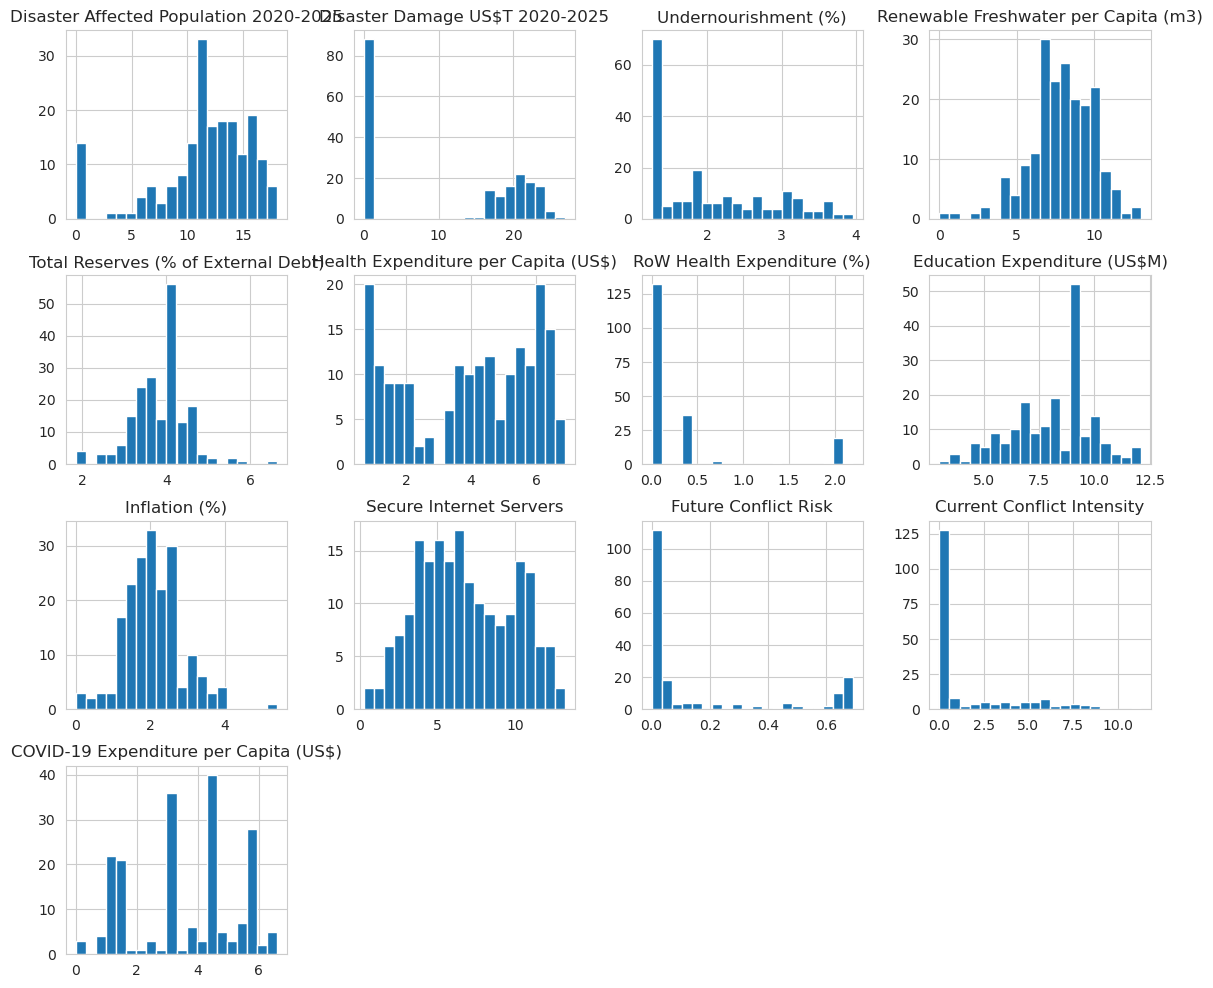

In [20]:
# log transform
log_transform_cols = ['Disaster Affected Population 2020-2025',
                      'Disaster Damage US$T 2020-2025',
                      'Undernourishment (%)',
                      'Renewable Freshwater per Capita (m3)',
                      'Total Reserves (% of External Debt)',
                      'Health Expenditure per Capita (US$)',
                      'RoW Health Expenditure (%)',
                      'Education Expenditure (US$M)',
                      'Inflation (%)',
                      'Secure Internet Servers',
                      'Future Conflict Risk',
                      'Current Conflict Intensity',
                      'COVID-19 Expenditure per Capita (US$)',
                      ]

df_log = df.copy()

# remove single -1 value (Seychelles) from inflation column by replacing all < 0 with 0
df_log['Inflation (%)'] = df_log['Inflation (%)'].apply(lambda x: 0 if x < 0 else x)

df_log[log_transform_cols] = np.log1p(df_log[log_transform_cols])

df_log[log_transform_cols].hist(bins=20, figsize=(14, 12))

In [21]:
find_outliers_per_indicator(df_log).head(10)

,Indicator,Outliers,Outlier Percentage
18,Future Conflict Risk,31.0,16.15
5,Population below Poverty Line (%),28.0,14.58
11,Government Debt (% of GDP),24.0,12.50
7,RoW Health Expenditure (%),22.0,11.46
19,Current Conflict Intensity,15.0,7.81
1,Disaster Affected Population 2020-2025,15.0,7.81
33,disease_PC4,14.0,7.29
8,No Education (%),12.0,6.25
31,disease_PC2,10.0,5.21
29,water_air_PC3,9.0,4.69


In [22]:
# flip indicators that inversely correlate with the GSEI
inverse_indicators = ['Renewable Freshwater per Capita (m3)', 
                      'Renewable Energy Consumption (%)', 
                      'Total Reserves (% of External Debt)', 
                      'Secure Internet Servers',
                      'Education Expenditure (US$M)', 
                      'Health Expenditure per Capita (US$)',
                      'COVID-19 Expenditure per Capita (US$)',
                      ]

df_inv = df_log.copy()

df_inv[inverse_indicators] = df_inv[inverse_indicators] * -1

In [23]:
# scale using z-score
dfn = df_inv.copy()

z_score_cols = dfn.drop(columns=categories['pca']).columns.tolist()

scaler = StandardScaler()
dfn[z_score_cols] = scaler.fit_transform(dfn[z_score_cols])

## Check distributions after different scaling methods

In [24]:
dfn.describe()

,Temp Change max 2012-2022,Disaster Affected Population 2020-2025,Disaster Damage US$T 2020-2025,Undernourishment (%),Renewable Freshwater per Capita (m3),Population below Poverty Line (%),Health Expenditure per Capita (US$),RoW Health Expenditure (%),No Education (%),Education Expenditure (US$M),...,pol_PC4,pol_PC5,pol_PC6,water_air_PC1,water_air_PC2,water_air_PC3,disease_PC1,disease_PC2,disease_PC3,disease_PC4
count,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,192.000000,...,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02
mean,4.834096e-16,5.643634e-16,-8.095376e-17,2.775558e-16,2.590520e-16,3.330669e-16,-2.590520e-16,3.932040e-17,-2.775558e-17,0.000000,...,1.156482e-17,-2.312965e-18,-1.966020e-17,1.850372e-17,2.312965e-18,4.394633e-17,-1.850372e-17,3.469447e-17,4.625929e-18,-2.081668e-17
std,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614,...,3.977459e-01,3.176140e-01,2.148681e-01,1.560882e+00,6.174005e-01,4.451642e-01,1.465526e+00,9.463280e-01,8.580827e-01,4.912571e-01
min,-1.940897e+00,-2.666304e+00,-1.070589e+00,-9.828916e-01,-2.494739e+00,-1.644668e+00,-1.500715e+00,-5.116095e-01,-9.199881e-01,-2.132510,...,-1.283546e+00,-6.894659e-01,-5.051440e-01,-1.719293e+00,-1.573411e+00,-1.409718e+00,-2.274860e+00,-1.202201e+00,-1.921484e+00,-1.515164e+00
25%,-6.916878e-01,-2.962201e-01,-1.070589e+00,-9.828916e-01,-6.863857e-01,-7.036824e-01,-8.942214e-01,-5.116095e-01,-7.470615e-01,-0.589230,...,-2.609046e-01,-2.065138e-01,-1.560684e-01,-1.206787e+00,-3.727619e-01,-2.677343e-01,-1.208104e+00,-4.577580e-01,-6.073452e-01,-2.120322e-01
50%,-2.877753e-01,1.016040e-01,5.596172e-01,-1.961290e-01,-1.450723e-02,-1.515205e-02,-2.135201e-01,-5.116095e-01,-4.662263e-01,-0.099037,...,-2.822036e-02,-2.178154e-02,-2.472376e-02,-4.100940e-01,-6.475822e-02,-5.574288e-02,-2.695779e-01,-1.316508e-01,2.950505e-02,-1.375219e-02
75%,6.098081e-01,6.746412e-01,9.068265e-01,7.545106e-01,5.974598e-01,0.000000e+00,1.018111e+00,1.203596e-01,3.389468e-01,0.762316,...,2.460013e-01,1.478448e-01,1.593449e-01,8.426194e-01,4.549084e-01,2.239673e-01,1.083993e+00,1.532417e-01,4.572951e-01,2.816560e-01
max,3.127399e+00,1.509282e+00,1.524695e+00,2.406431e+00,3.913801e+00,4.199348e+00,1.638986e+00,2.913045e+00,3.526608e+00,2.734198,...,1.322188e+00,1.382609e+00,5.804977e-01,7.462149e+00,3.827202e+00,2.001702e+00,3.704726e+00,6.258024e+00,2.565955e+00,1.591472e+00


array([[<Axes: title={'center': 'Temp Change max 2012-2022'}>,
        <Axes: title={'center': 'Disaster Affected Population 2020-2025'}>,
        <Axes: title={'center': 'Disaster Damage US$T 2020-2025'}>,
        <Axes: title={'center': 'Undernourishment (%)'}>,
        <Axes: title={'center': 'Renewable Freshwater per Capita (m3)'}>],
       [<Axes: title={'center': 'Population below Poverty Line (%)'}>,
        <Axes: title={'center': 'Health Expenditure per Capita (US$)'}>,
        <Axes: title={'center': 'RoW Health Expenditure (%)'}>,
        <Axes: title={'center': 'No Education (%)'}>,
        <Axes: title={'center': 'Education Expenditure (US$M)'}>],
       [<Axes: title={'center': 'Crime Rate'}>,
        <Axes: title={'center': 'Government Debt (% of GDP)'}>,
        <Axes: title={'center': 'Total Reserves (% of External Debt)'}>,
        <Axes: title={'center': 'Gini Coefficient'}>,
        <Axes: title={'center': 'Inflation (%)'}>],
       [<Axes: title={'center': 'Youth U

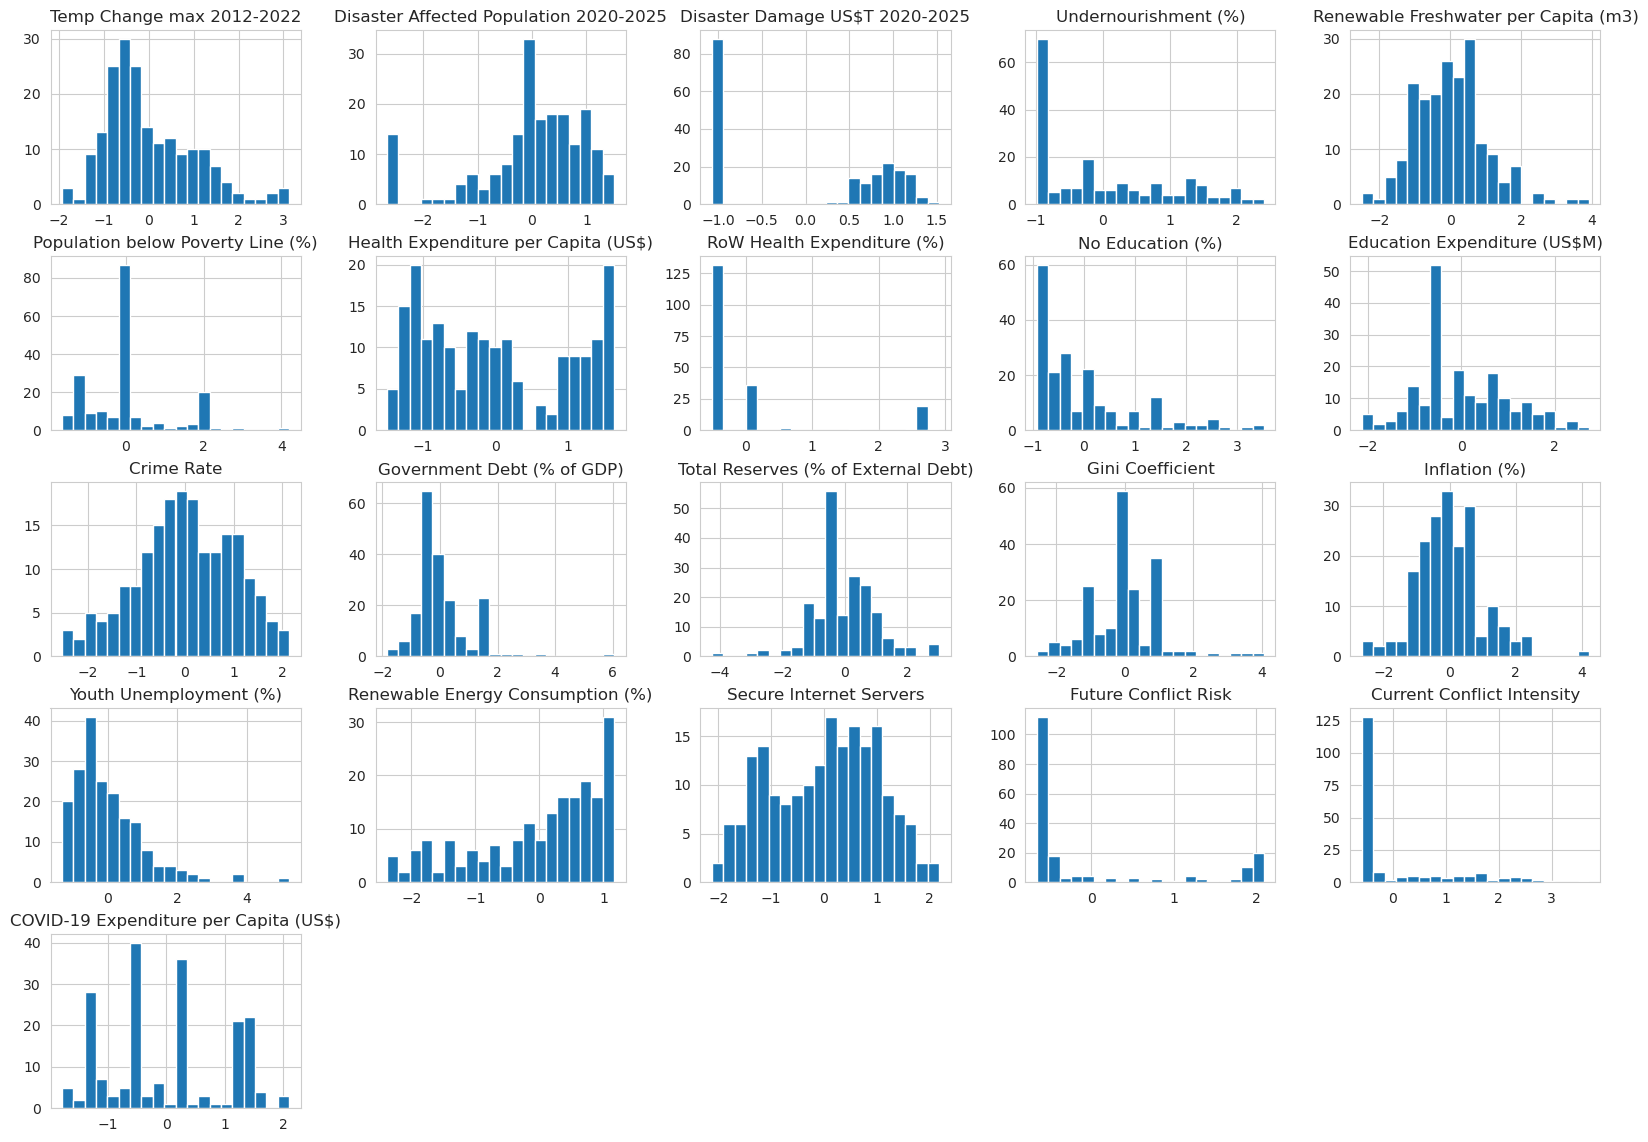

In [25]:
dfn.drop(columns=categories['pca']).hist(bins=20, figsize=(20, 14))

In [26]:
def variances(df, threshold=5):
    # compute variance for each variable
    variances = df.var().sort_values(ascending=False)
    
    # identify potential imbalances
    high_variance = variances[variances > variances.median() * threshold]
    low_variance = variances[variances < variances.median() / threshold]
    
    print('Median:', variances.median())
    
    print("\nHigh-Variance Variables (May Dominate Weighting):")
    print(high_variance)
    
    print("\nLow-Variance Variables (May Be Underweighted):")
    print(low_variance)

variances(dfn)

Median: 1.0052356020942408

High-Variance Variables (May Dominate Weighting):
pol_PC1    5.61711
dtype: float64

Low-Variance Variables (May Be Underweighted):
water_air_PC3    0.198171
pol_PC4          0.158202
pol_PC5          0.100879
pol_PC6          0.046168
dtype: float64


- PCs having high or low variance is not a problem as they represent multiple indicators with a different "view" that is embedded in them

## Save Normalised Data

In [28]:
dfn.to_csv("data/processing/normalised_all_data.csv", index=False)